# Notebook para manipulación de Señales digitales.

Desarrollado por Juan Manuel Grosso, Martin Haimovich, Guido Santoro e Ignacio Veiga, en el marco de la materia Señales y Sistemas, profesora Trina Adrián, para la carrera de Ingeniería de Sonido en la Universidad Nacional de Tres de Febrero.

#### Bienvenido Usuario!

Primero, importaremos librerías necesarias para el procesamiento que realizaremos. Destacamos la importancia de ejecutar secuencialmente y de forma ordenada los bloques para que no haya problema con la definición de las variables. Siéntase libre de modificar alguna de las variables comentadas para ver variaciones en los resultados.


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import fftplot as fftplt
from scipy.fftpack import fft, ifft
import generador as gen
from desplazagiro import desplazagiro
from girodesplaza import girodesplaza


Las primeras variables a definir son los límites temporales y la frecuencia de muestreo para nuestro vector temporal. Es fundamental ejecutar el siguiente bloque antes que cualquier otro.


In [2]:
samplerate = 1000  #Frecuencia de Muestreo
timestart=-2       #Tiempo Inicial
timestop=2         #Tiempo Final
timestep=1/samplerate           
timevec = np.arange(timestart,timestop,timestep)   #Vector Temporal
N=48000          #Cantidad de puntos de la FFT (debe ser potencia de 2)

## Sección 3: Convolución.

En esta sección se pueden convolucionar distintas señales al ejecutar los bloques correpondientes o utilizar inputs en el último de los bloques.

## Convolución General

Seleccione un tipo de señal ingresando el número correspondiente para la primera señal a convolucionar en la variable sigtype1, y el valor para la segunda señal en sigtype2:

###### 1 : Coseno
###### 2 : Cuadrada (Tren de pulsos)
###### 3 : diente de sierra
###### 4 : Sinc
###### 5 : Pulso Rectangular
###### 6 : Pulso Triangular
###### 7 : Escalón
###### 8 : Signo
###### 9 : Exponencial Unilateral
###### 10 : Exponencial Bilateral
###### 
También puede modificar los parámetros desde la siguiente celda. Una vez definidos se corren las dos celdas y se graficarán las señales y su convolución.

In [3]:
#PARÁMETROS PRIMERA SEÑAL:

sigtype1=1         #Señal 1

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=1               #Desplazamiento en segundos
giro=1             #Giro (0 ó 1)

sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

#PARÁMETROS SEGUNDA SEÑAL:

sigtype2=1         #Señal 2

amplitud2=1         #Amplitud
DC2=0               #DC
frecuencia2=5       #Frecuencia
fase2=0             #Fase
duty2=50            #Duty (Para Tren de Pulsos)
width2=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte2=1      #Primer Corte (Para Sinc)
ancho2=1            #Ancho para los pulsos rectangulares y triangulares
t02=1              #Desplazamiento en segundos
giro2=1             #Giro (0 ó 1)

sigmanip2=2         #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

(-10.0, 10.0)

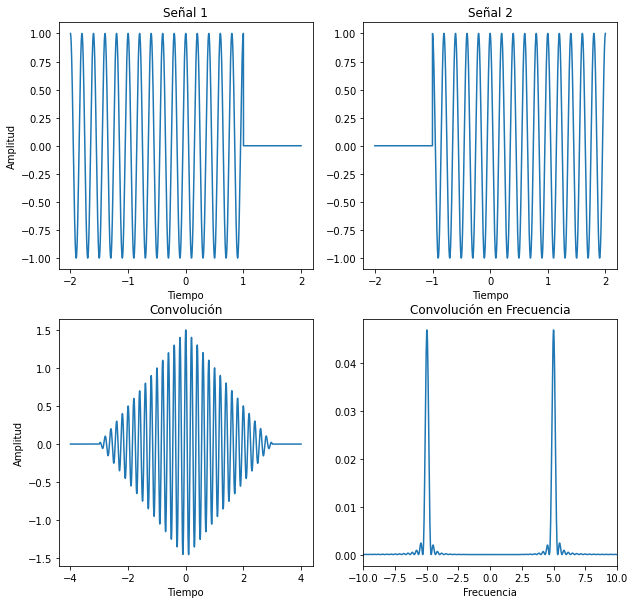

In [4]:
sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
elif sigmanip1 == 2:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)
else:
    pass
    
sig2= gen.generador(timevec, samplerate, amplitud2, DC2, frecuencia2, fase2, duty2, width2, primercorte2, ancho2, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t02, giro2)
elif sigmanip2 == 2:
    sig2=girodesplaza(sig2, timevec, samplerate, t02, giro2)
else:
    pass
   

sigconvo = np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * np.maximum(frecuencia,frecuencia2) , 2 * np.maximum(frecuencia,frecuencia2))

## Convolución Interactiva
Simplemente defina los parámetros y luego corra las dos celdas, la segunda celda lo guiará para elegir el tipo de señal y de manipulación.

In [5]:
#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=1               #Desplazamiento en segundos
giro=1             #Giro (0 ó 1)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud2=1         #Amplitud
DC2=0               #DC
frecuencia2=5       #Frecuencia
fase2=0             #Fase
duty2=50            #Duty (Para Tren de Pulsos)
width2=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte2=1      #Primer Corte (Para Sinc)
ancho2=1            #Ancho para los pulsos rectangulares y triangulares
t02=1               #Desplazamiento en segundos
giro2=1             #Giro (0 ó 1)

23978
-35967.0
35967.0


(-10.0, 10.0)

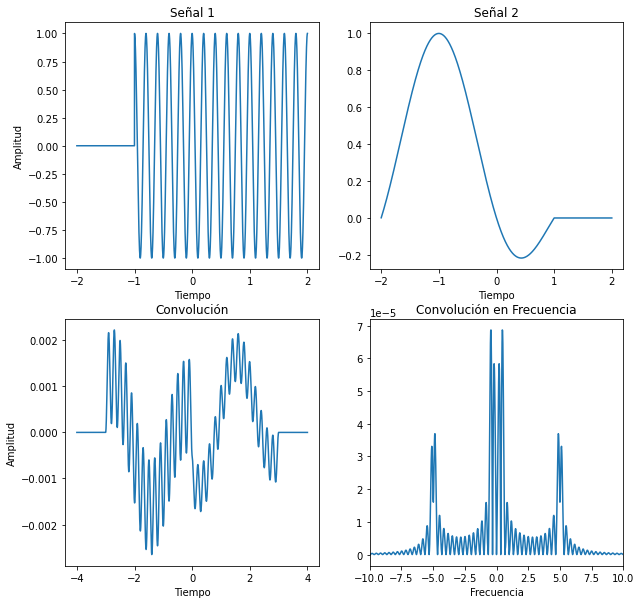

In [6]:
sigtype1=0
while 1 > sigtype1 or sigtype1 > 10 :
    sigtype1 = input('''Seleccione un tipo de señal ingresando el número correspondiente para la
                primera señal a convolucionar:
                1 : Coseno
                2 : Cuadrada (Tren de pulsos)
                3 : diente de sierra
                4 : Sinc
                5 : Pulso Rectangular
                6 : Pulso Triangular
                7 : Escalón
                8 : Signo
                9 : Exponencial Unilateral
                10 : Exponencial Bilateral
                ''')
    sigtype1=int(sigtype1)
    

sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, int(sigtype1))

sigmanip1=0
while sigmanip1 != 1 or sigmanip1 != 2 :
    sigmanip1 = input('''Seleccione la manipulación a aplicar a la primer señal:
    1 : Desplazamiento-Giro
    2 : Giro-Desplazamiento
    ''')
    sigmanip1=int(sigmanip1)
    if sigmanip1 == 1 or sigmanip1 == 2:
        sigmanip1=sigmanip1
        break

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
elif sigmanip1 == 2:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)
else:
    pass


sigtype2=0
while 1 > sigtype2 or sigtype2 > 10 :
    sigtype2 = input('''Seleccione un tipo de señal ingresando el número correspondiente para la
                segunda señal a convolucionar:
                1 : Coseno
                2 : Cuadrada (Tren de pulsos)
                3 : diente de sierra
                4 : Sinc
                5 : Pulso Rectangular
                6 : Pulso Triangular
                7 : Escalón
                8 : Signo
                9 : Exponencial Unilateral
                10 : Exponencial Bilateral
                ''')
    sigtype2=int(sigtype2)


sig2= gen.generador(timevec, samplerate, amplitud2, DC2, frecuencia2, fase2, duty2, width2, primercorte2, ancho2, int(sigtype2))

sigmanip2=0
while sigmanip2 != 1 or sigmanip2 != 2 :
    sigmanip2 = input('''Seleccione la manipulación a aplicar a la primer señal:
    1 : Desplazamiento-Giro
    2 : Giro-Desplazamiento
    ''')
    sigmanip2=int(sigmanip2)
    if sigmanip2 == 1 or sigmanip2 == 2:
        sigmanip2=sigmanip2
        break

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t02, giro2)
elif sigmanip2 == 2:
    sig2=girodesplaza(sig2, timevec, samplerate, t02, giro2)
else:
    pass


sigconvo= np.convolve(sig1,sig2)/samplerate

timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)


X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N

max=np.argmax(MX)
print(max)

LIM = -(1.5*(np.abs(np.argmax(MX))))
print(LIM)

LIM2 = (1.5*(np.abs(np.argmax(MX))))
print(LIM2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * np.maximum(frecuencia,frecuencia2) , 2 * np.maximum(frecuencia,frecuencia2))

### 1 - Convolución Coseno-Coseno

(-10.0, 10.0)

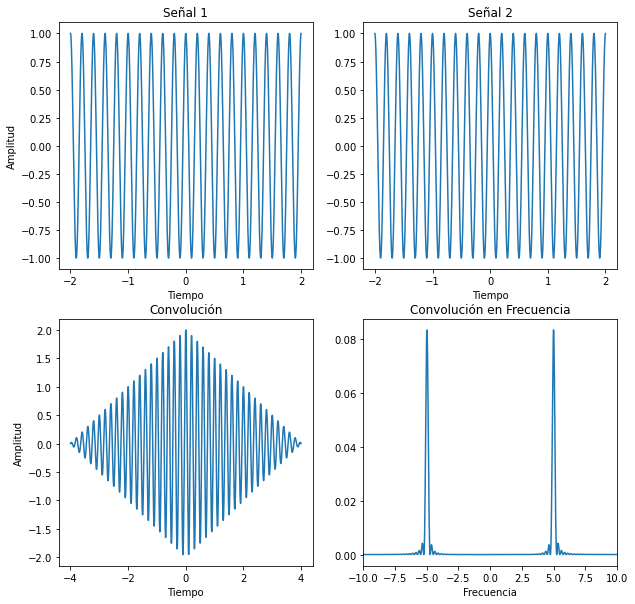

In [7]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)


sigtype2=1         #Coseno (No modificar)


#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)


sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 2 - Convolución Coseno-Sinc

(-10.0, 10.0)

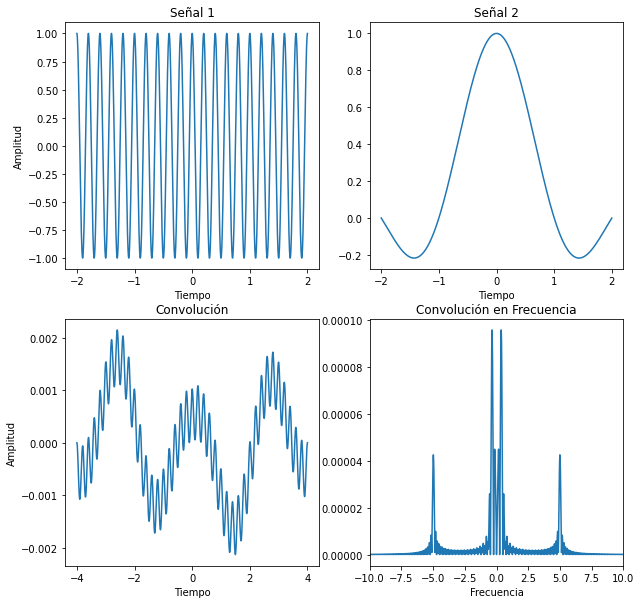

In [8]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=4         #Sinc (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 3 - Convolución Coseno-Pulso Rectangular

(-10.0, 10.0)

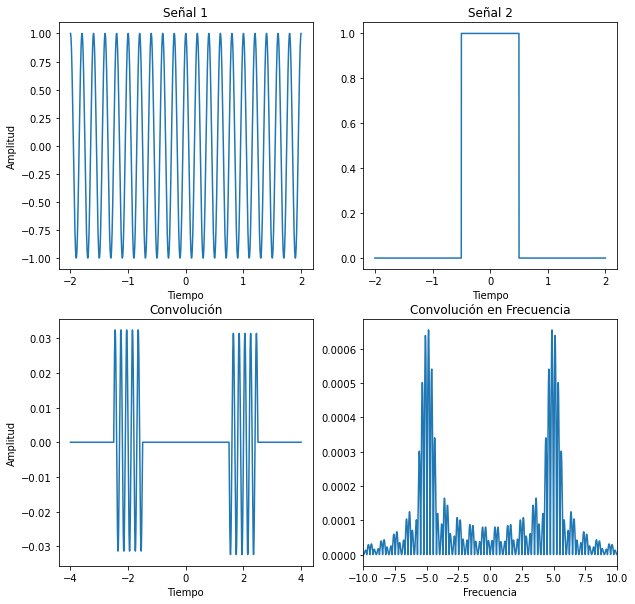

In [9]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=5         #P. Rect. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 4 - Convolución Coseno-Pulso Triangular

(-10.0, 10.0)

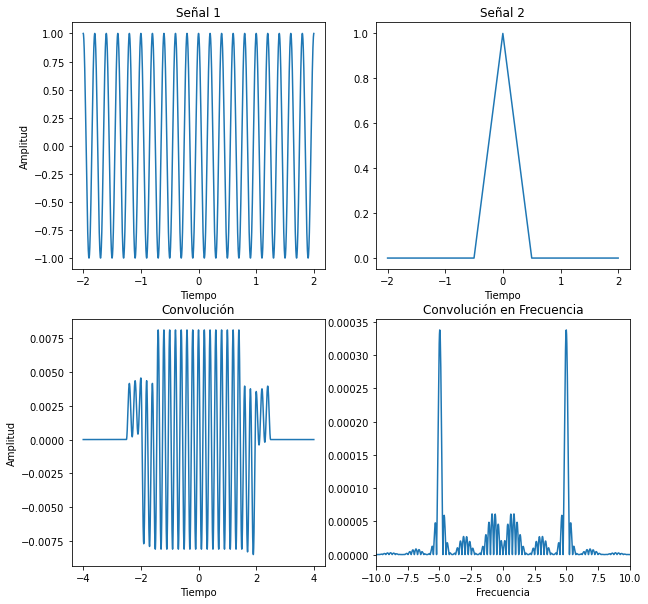

In [10]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=6         #P. Triang. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 5 - Convolución Coseno-Escalón

(-10.0, 10.0)

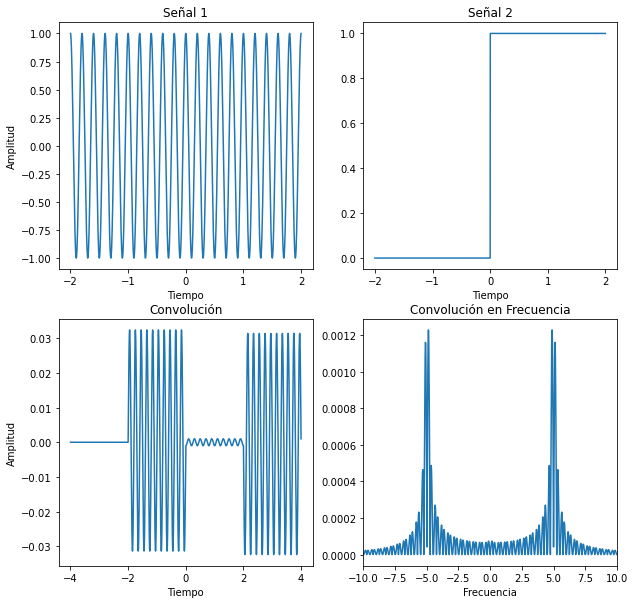

In [11]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=7         #Escalón (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 6 - Convolución Coseno-Signo

(-10.0, 10.0)

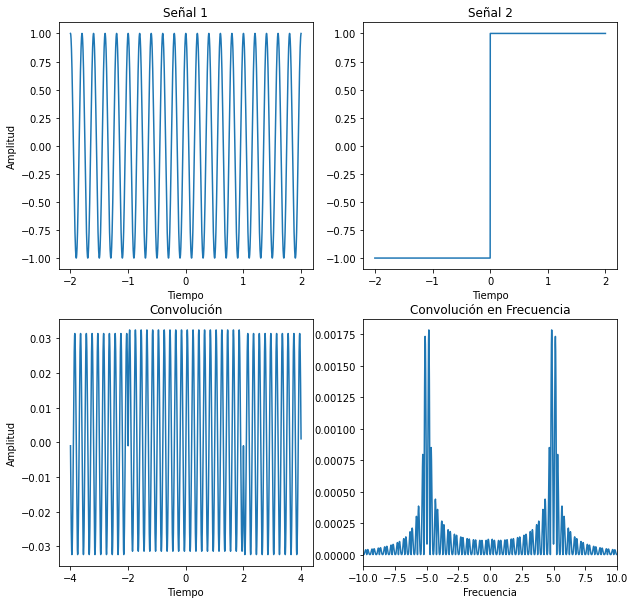

In [12]:
sigtype1=1         #Coseno (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=8         #Signo (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 7 - Convolución Sinc-Pulso Rectangular

(-10.0, 10.0)

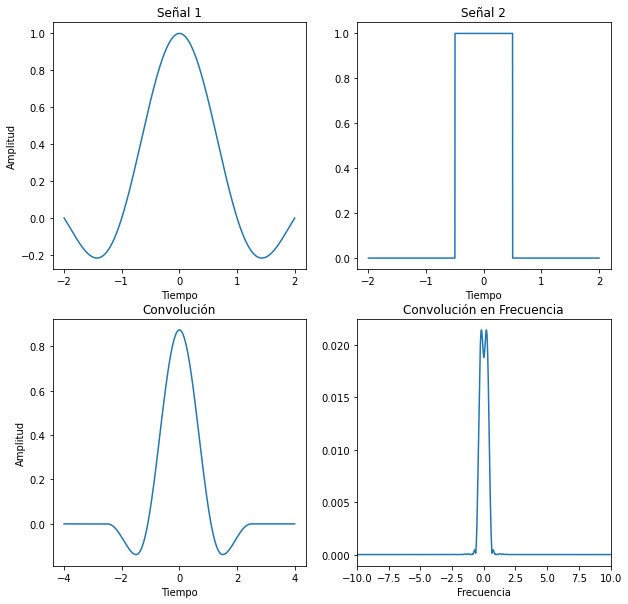

In [13]:
sigtype1=4         #Sinc (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=5         #P. Rect. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 8 - Convolución Sinc-Pulso Triangular

(-10.0, 10.0)

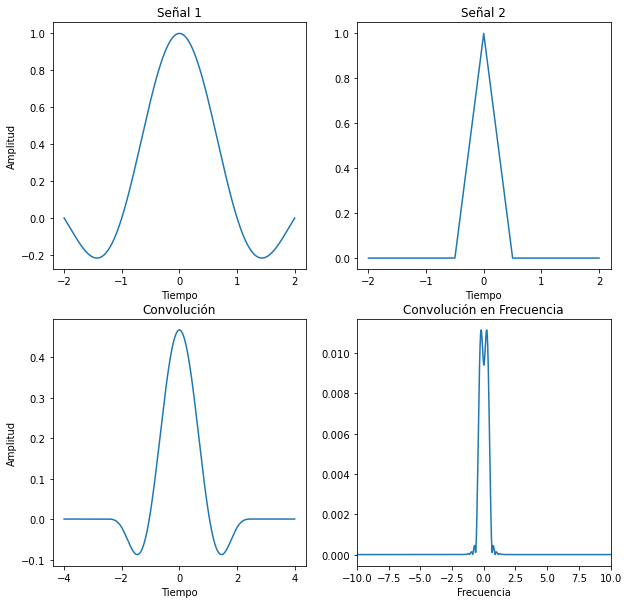

In [14]:
sigtype1=4         #Sinc (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=6         #P. Triang. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 9 - Convolución Sinc-Escalón

(-10.0, 10.0)

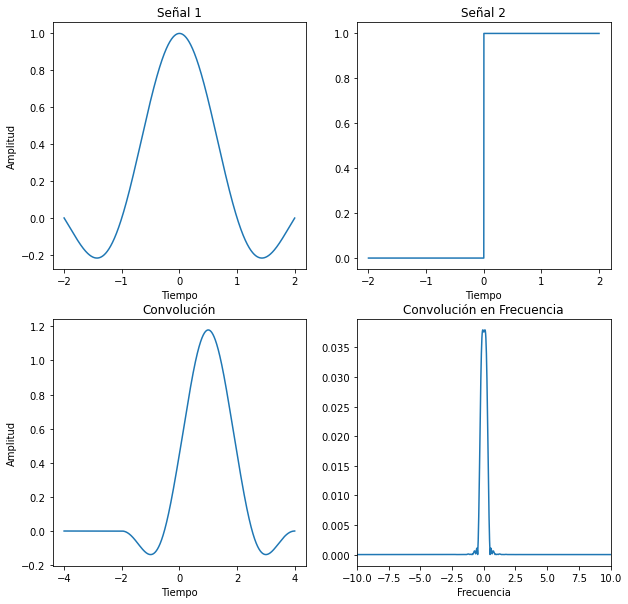

In [15]:
sigtype1=4         #Sinc (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=7         #Escalón (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 10 - Convolución Sinc-Sinc

(-10.0, 10.0)

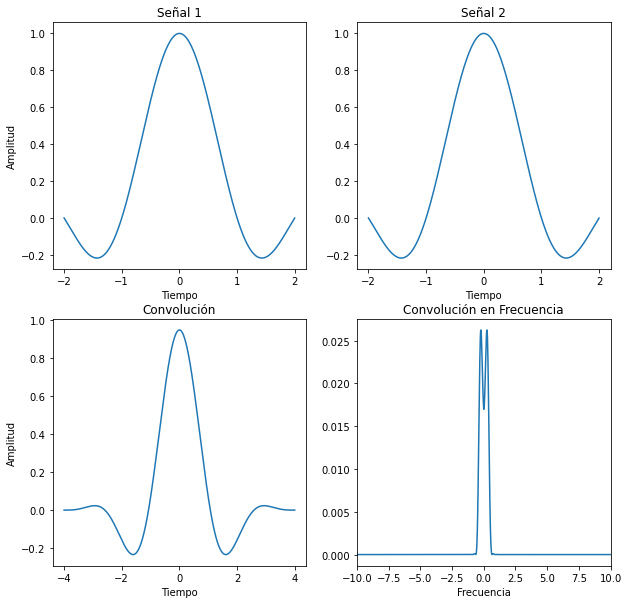

In [16]:
sigtype1=4         #Sinc (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=4         #Sinc (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 11 - Convolución Pulso Rectangular-Pulso Triangular

(-10.0, 10.0)

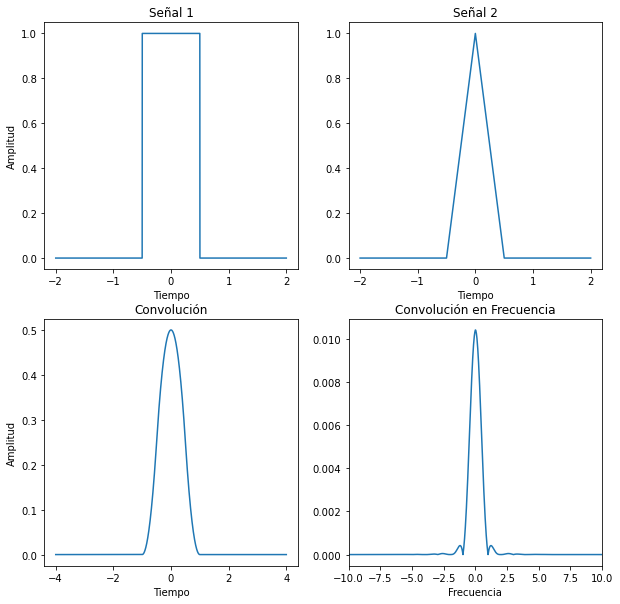

In [17]:
sigtype1=5         #P.Rect. (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=6         #P. Triang. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 12 - Convolución Pulso Rectangular-Pulso Rectangular

(-10.0, 10.0)

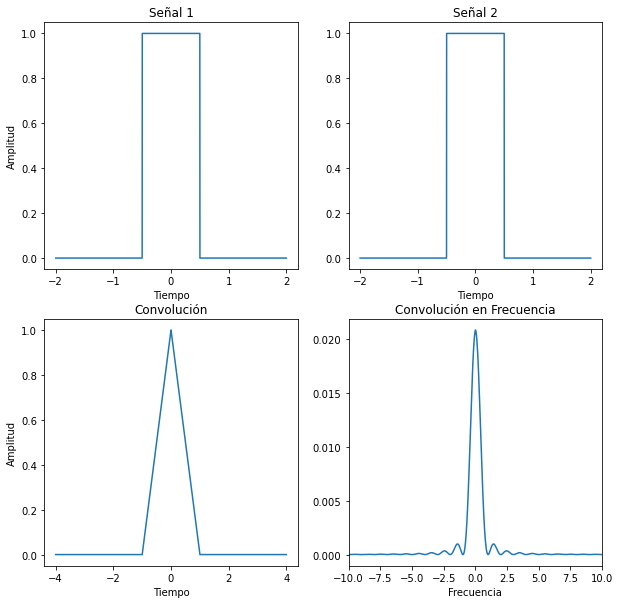

In [18]:
sigtype1=5         #P. Rect. (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=5         #P. Rect. (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 13 - Convolución Pulso Rectangular-Signo

(-10.0, 10.0)

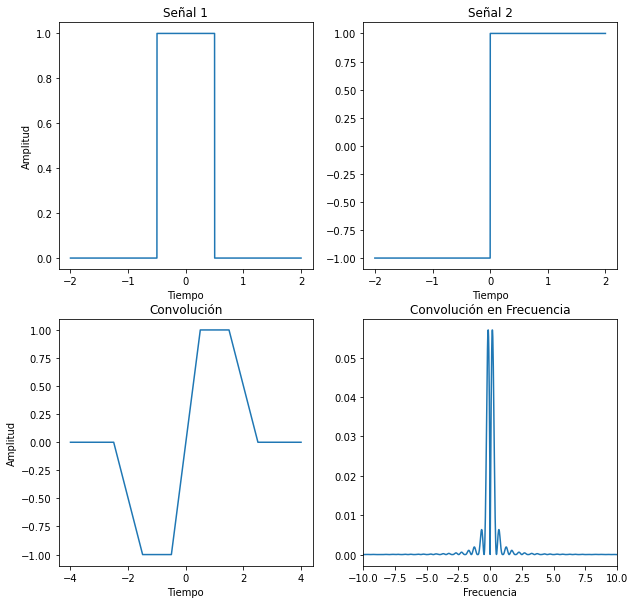

In [19]:
sigtype1=5         #P. Rect. (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=8         #Signo (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 14 - Convolución Pulso Triangular-Escalón

(-10.0, 10.0)

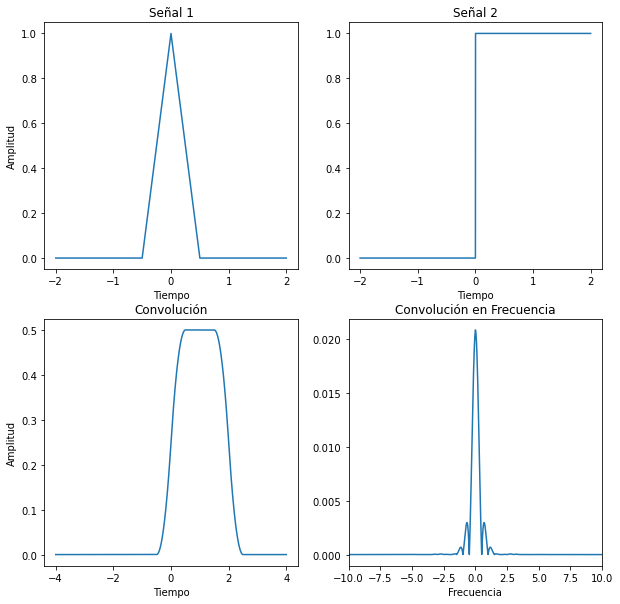

In [20]:
sigtype1=6         #P. Triang. (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=7         #Escalón (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 15 - Convolución Pulso Triangular-Signo

(-10.0, 10.0)

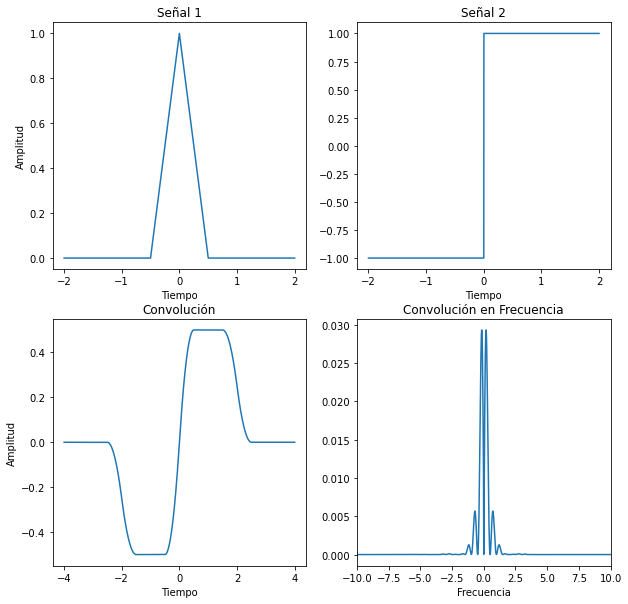

In [21]:
sigtype1=6         #P. Triang. (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=8         #Signo (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)

### 16 - Convolución Escalón-Signo

(-10.0, 10.0)

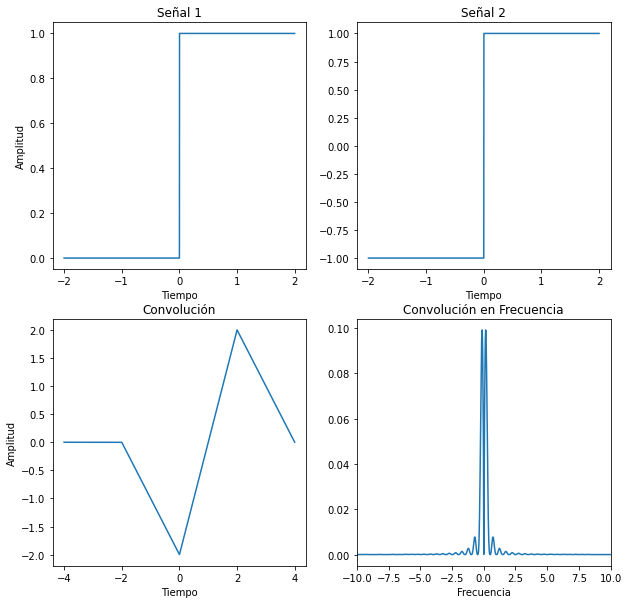

In [22]:
sigtype1=7         #Escalón (No modificar)

#PARÁMETROS PRIMERA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip1=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)


sig1= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype1)

if sigmanip1 == 1:
    sig1=desplazagiro(sig1, timevec, samplerate, t0, giro)
else:
    sig1=girodesplaza(sig1, timevec, samplerate, t0, giro)

sigtype2=8         #Signo (No modificar)

#PARÁMETROS SEGUNDA SEÑAL:

amplitud=1         #Amplitud
DC=0               #DC (Para periódicas)
frecuencia=5       #Frecuencia (para periódicas)
fase=0             #Fase
duty=50            #Duty (Para Tren de Pulsos)
width=0.5          #Entre 0 y 1, Posición del Pico (Para Señal Triangular)
primercorte=1      #Primer Corte (Para Sinc)
ancho=1            #Ancho para los pulsos rectangulares y triangulares
t0=0               #Desplazamiento en segundos
giro=0             #Giro (0 ó 1)
sigmanip2=1        #Órden de Manipulación (1: desplazamiento-giro , 2: giro-desplazamiento)

sig2= gen.generador(timevec, samplerate, amplitud, DC, frecuencia, fase, duty, width, primercorte, ancho, sigtype2)

if sigmanip2 == 1:
    sig2=desplazagiro(sig2, timevec, samplerate, t0, giro)
else:
    sig2=girodesplaza(sig2, timevec, samplerate, t0, giro)
    

sigconvo= np.convolve(sig1,sig2)/samplerate


timevecconvo=np.arange(2*timestart,(2*timestop)-(timestep),timestep)

X = fft(sigconvo,N)
lim = int(np.ceil((N+1)/2) - 1)
X = np.append(X[lim:1:-1], X[0:lim])
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
plt.setp(ax1, xlabel='Tiempo')
plt.setp(ax2, xlabel='Tiempo')
plt.setp(ax3, xlabel='Tiempo')
plt.setp(ax4, xlabel='Frecuencia')
plt.setp(ax1, ylabel='Amplitud')
plt.setp(ax3, ylabel='Amplitud')
ax1.set_title('Señal 1')
ax2.set_title('Señal 2')
ax3.set_title('Convolución')
ax4.set_title('Convolución en Frecuencia')
ax1.plot(timevec,sig1)
ax2.plot(timevec,sig2)
ax3.plot(timevecconvo,sigconvo)
ax4.plot(f,MX)
ax4.set_xlim( (-2) * frecuencia , 2 * frecuencia)